In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [23]:
LN_biorepository = pd.read_csv('../data/LN_biorepository_data_v20250313.csv')
LN_biorepository.head()
LN_biorepository = LN_biorepository.drop(columns=['Unnamed: 19'])
LN_biorepository = LN_biorepository.astype({
    'max_dsDNA_IU_per_mL': 'int64',
    'dsDNA_pos_neg': 'object'
    }) 
print(LN_biorepository.dtypes)
LN_biorepository.isnull().sum()

Patient_Sample_ID             int64
Biological_Sex               object
Population                   object
dsDNA_pos_neg                object
max_dsDNA_IU_per_mL           int64
TNIP1_rs7708392_genotype     object
Sample_N                      int64
Sample_1_Date                 int64
Sample_1_Type                object
LN_Class_1                   object
Sample_2_Date               float64
Sample_2_Type                object
LN_Class_2                   object
Sample_3_Date               float64
Sample_3_Type                object
LN_Class_3                   object
Sample_4_Date               float64
Sample_4_Type                object
LN_Class_4                   object
dtype: object


Patient_Sample_ID            0
Biological_Sex               0
Population                   0
dsDNA_pos_neg                0
max_dsDNA_IU_per_mL          0
TNIP1_rs7708392_genotype     0
Sample_N                     0
Sample_1_Date                0
Sample_1_Type                0
LN_Class_1                   0
Sample_2_Date               12
Sample_2_Type               12
LN_Class_2                  12
Sample_3_Date               19
Sample_3_Type               19
LN_Class_3                  19
Sample_4_Date               20
Sample_4_Type               20
LN_Class_4                  20
dtype: int64

  Population LN_Class_1  LN_Class_Size
0         AA        III              3
1         AA      III/V              4
2         AA         IV              3
3         AA       IV/V              3
4         AA          V              5
5          E      III/V              1
6          E         IV              3


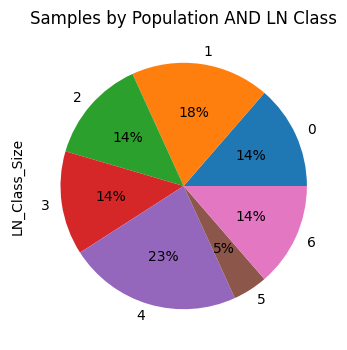

In [91]:
#Create a pie chart for number of samples by LN Class, grouped by population
agg_data = LN_biorepository.groupby(['Population', 'LN_Class_1']).agg(
        LN_Class_Size = pd.NamedAgg(column="LN_Class_1", aggfunc="size")
        ).reset_index()
print(agg_data)

agg_data.plot(
    kind='pie',
    y='LN_Class_Size',
    autopct='%1.0f%%',
    title='Samples by Population AND LN Class',
    legend=False,
    figsize=(4, 4)
    )
plt.show()

pie chart above used index; could not figure out how to show LN Class by population; tried setting the index, but that didn't work, making a new variable with population and LN class together may work

  LN_Class_1  LN_Class_Size
0        III              3
1      III/V              5
2         IV              6
3       IV/V              3
4          V              5


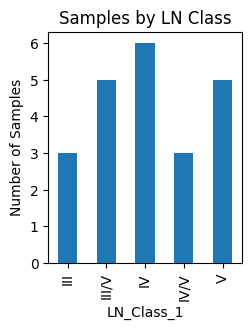

In [71]:
#Create a bar chart for number of samples by LN Class
agg_data = LN_biorepository.groupby(['LN_Class_1']).agg(
        LN_Class_Size = pd.NamedAgg(column="LN_Class_1", aggfunc="size")
        ).reset_index()
print(agg_data)

agg_data.plot(
    kind='bar',
    x='LN_Class_1',
    y='LN_Class_Size',
    ylabel='Number of Samples',
    title='Samples by LN Class',
    legend=False,
    figsize=(2.5, 3)
    )
plt.show()


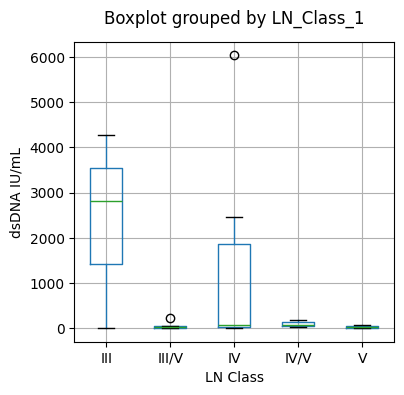

In [90]:
#Box plot of dsDNA concentration by LN Class
LN_biorepository.boxplot(
    column=['max_dsDNA_IU_per_mL'],
    by='LN_Class_1',
    figsize=(4, 4),
    ylabel='dsDNA IU/mL',
    xlabel='LN Class',
)
plt.title('')
plt.show()

Violin plot of dsDNA concentration by LN Class and Population using seaborn

<Axes: xlabel='LN_Class_1', ylabel='max_dsDNA_IU_per_mL'>

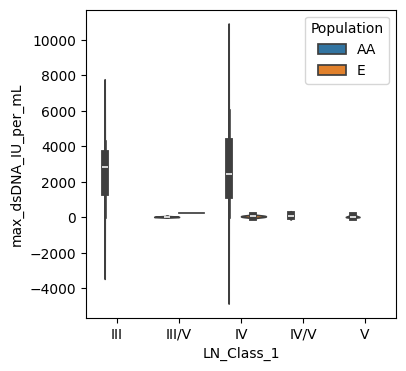

In [95]:
plt.figure(figsize=(4,4))
sns.violinplot(x='LN_Class_1',
               y='max_dsDNA_IU_per_mL',
               data=LN_biorepository,
               hue='Population',
               )

make a strip plot of dsDNA concentration by LN class and population using seaborn 

<Axes: xlabel='LN_Class_1', ylabel='max_dsDNA_IU_per_mL'>

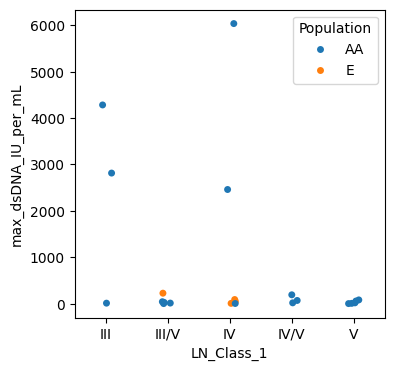

In [97]:
plt.figure(figsize=(4,4))
sns.stripplot(x='LN_Class_1',
              y='max_dsDNA_IU_per_mL',
              data=LN_biorepository,
              hue='Population',
              jitter=True)

seaborn count plot of number of samples by LN Class within each population 

C:\Users\david\AppData\Local\Temp\ipykernel_13252\1144251896.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc=7)


<Axes: xlabel='LN_Class_1', ylabel='count'>

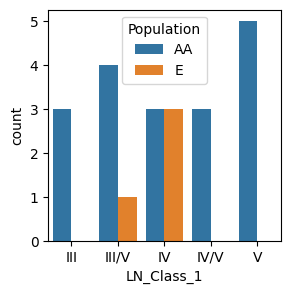

In [107]:
plt.figure(figsize=(3,3))
plt.legend(loc=7)
sns.countplot(x="LN_Class_1",
              data=LN_biorepository,
              hue='Population',
              )